In [2]:
import numpy as np
import pandas as pd
import os 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("evaluation_ids.csv")
metadata = pd.read_csv("metadata.csv")

In [4]:
eval_df = pd.merge(df, metadata, how='left',on='cell_id')

In [5]:
eval_df

,row_id,cell_id,gene_id,day,donor,cell_type,technology
0,0,c2150f55becb,CD86,2,27678,HSC,citeseq
1,1,c2150f55becb,CD274,2,27678,HSC,citeseq
2,2,c2150f55becb,CD270,2,27678,HSC,citeseq
3,3,c2150f55becb,CD155,2,27678,HSC,citeseq
4,4,c2150f55becb,CD112,2,27678,HSC,citeseq
...,...,...,...,...,...,...,...
65744175,65744175,2c53aa67933d,ENSG00000134419,7,27678,hidden,multiome
65744176,65744176,2c53aa67933d,ENSG00000186862,7,27678,hidden,multiome
65744177,65744177,2c53aa67933d,ENSG00000170959,7,27678,hidden,multiome
65744178,65744178,2c53aa67933d,ENSG00000107874,7,27678,hidden,multiome


In [6]:
df = eval_df[eval_df["technology"] == 'multiome']

In [8]:
cite_df = df.drop(['cell_id', 'row_id', 'technology'], axis = 1)

In [9]:
cite_df['donor'] = cite_df['donor'].apply(lambda x: 1 if x == 13176 else x)
cite_df['donor'] = cite_df['donor'].apply(lambda x: 2 if x == 27678 else x)
cite_df['donor'] = cite_df['donor'].apply(lambda x: 3 if x == 31800 else x)
cite_df['donor'] = cite_df['donor'].apply(lambda x: 4 if x == 32606 else x)

In [10]:
day = cite_df.set_index("gene_id")[["day"]].value_counts().to_frame()\
                .sort_values("day").reset_index()\
                .rename(columns={0:"# cells"})

donor = cite_df.set_index("gene_id")[["donor"]].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

cell_type = cite_df.set_index("gene_id")[["cell_type"]].value_counts().to_frame()\
                .sort_values("cell_type").reset_index()\
                .rename(columns={0:"# cells"})

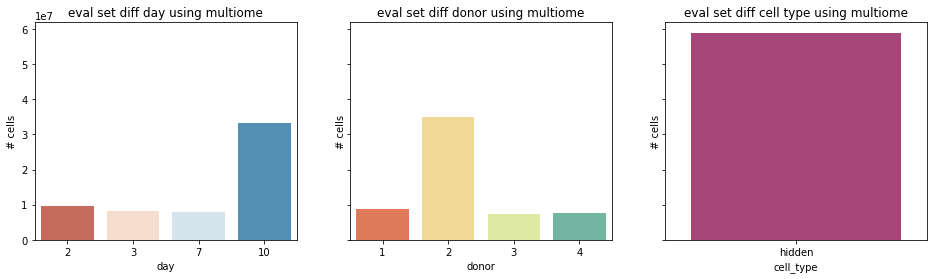

In [23]:
f, axs = plt.subplots(1, 3, figsize=(16,4), sharey=True)
sns.barplot(x = "day", y="# cells", data = day, palette="RdBu", ax = axs[0])
axs[0].set_title("eval set diff day using multiome")
sns.barplot(x = "donor", y="# cells", data = donor, palette="Spectral", ax = axs[1])
axs[1].set_title("eval set diff donor using multiome")
g = sns.barplot(x = "cell_type", y="# cells", data = cell_type, palette="magma", ax = axs[2])

axs[2].set_title("eval set diff cell type using multiome")
f.savefig('./image/1.2.png')

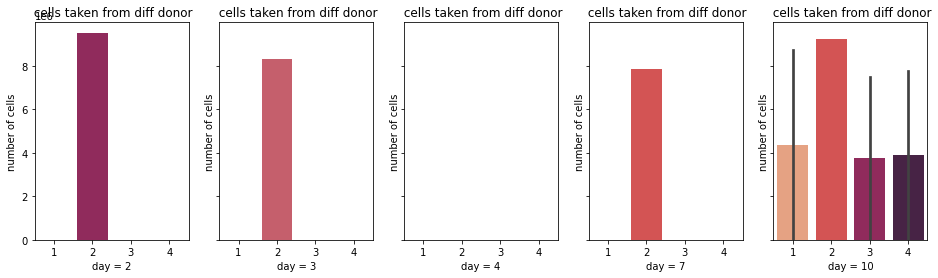

In [22]:
day_donor = cite_df.set_index("gene_id")[["day", 'donor']].value_counts().to_frame()\
                .sort_values("donor").reset_index()\
                .rename(columns={0:"# cells"})

day_donor_2 = day_donor[day_donor['day'] == 2]
day_donor_3 = day_donor[day_donor['day'] == 3]
day_donor_4 = day_donor[day_donor['day'] == 4]
day_donor_7 = day_donor[day_donor['day'] == 7]
day_donor_10 = day_donor[day_donor['day'] == 10]
df_empty_2 = pd.DataFrame({'day': [3, 4, 7],
                    'donor' : [1, 3, 4],
                    '# cells' : [0 , 0, 0]})

df_empty_3 = pd.DataFrame({'day': [2, 3, 4, 7],
                    'donor' : [1, 2, 3, 4],
                    '# cells' : [0 , 0, 0, 0]})

day_donor_2 = pd.concat([day_donor_2, df_empty_2], ignore_index = True, axis = 0)
day_donor_3 = pd.concat([day_donor_3, df_empty_2], ignore_index = True, axis = 0)
day_donor_4 = pd.concat([day_donor_4, df_empty_3], ignore_index = True, axis = 0)
day_donor_7 = pd.concat([day_donor_7, df_empty_2], ignore_index = True, axis = 0)
day_donor_10 = pd.concat([day_donor_10, df_empty_2], ignore_index = True, axis = 0)

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
sns.barplot(x=day_donor_2['donor'], y=day_donor_2['# cells'], palette="rocket", ax=ax1)
ax1.set_xlabel("day = 2")
ax1.set_ylabel("number of cells")
ax1.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_3['donor'], y=day_donor_3['# cells'], palette="flare", ax=ax2)
ax2.set_xlabel("day = 3")
ax2.set_ylabel("number of cells")
ax2.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_4['donor'], y=day_donor_4['# cells'], palette="magma", ax=ax3)
ax3.set_xlabel("day = 4")
ax3.set_ylabel("number of cells")
ax3.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_7['donor'], y=day_donor_7['# cells'], palette="rocket_r", ax=ax4)
ax4.set_xlabel("day = 7")
ax4.set_ylabel("number of cells")
ax4.set_title(" cells taken from diff donor")

sns.barplot(x=day_donor_10['donor'], y=day_donor_10['# cells'], palette="rocket_r", ax=ax5)
ax5.set_xlabel("day = 10")
ax5.set_ylabel("number of cells")
ax5.set_title(" cells taken from diff donor")

f.savefig('./image/3.1.1.png')